### Assignment 5.3: Housing Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.datasets import boston_housing
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

**Normalizing Data**

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean

In [5]:
std = train_data.std(axis=0)
train_data /= std

In [6]:
test_data -= mean
test_data /= std

**Building the Network**

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

**K-Fold Validation**

In [8]:
k=4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

**Training the Model**

In [9]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


**Comparing Folds**

In [13]:
all_mae_histories = []

In [14]:
model = build_model()
history = model.fit(partial_train_data, partial_train_targets, 
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)

In [15]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [16]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting Validation Scores**

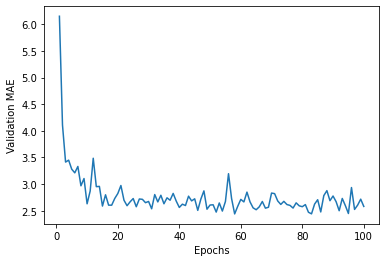

In [17]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

**Results**

In [27]:
all_scores

[2.2805142402648926, 2.825031042098999, 2.5533194541931152, 2.4775116443634033]

In [28]:
np.mean(all_scores)

2.5340940952301025

The model has an average error of $2,534.